In [10]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns
import scipy.stats

%matplotlib inline

sns.set_style("ticks")

In [11]:
mydir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/'

In [12]:
metadata_file = mydir+'data/metadata/sample_tracking.tsv'
metadata_df = pd.read_csv(metadata_file, sep='\t')

metadata_df = metadata_df.set_index('sanger_sample_id', drop=False)

# metadata_df = metadata_df[['treatment']]

metadata_df.head()

,sample_id,run,plate_barcode,date_of_submission,name,pool_id,protocol,bio_replicate_id,tech_replicate_id,10x_replicate_id,time_point,treatment,code,sequencescape,sanger_sample_id,number_of_cells_loaded,percentage_survival,comment
sanger_sample_id,,,,,,,,,,,,,,,,,,
5245STDY7352549,cellranger211_count_25419_5245STDY7352549_hg19...,25419,SCGC-10X-00003100,21-02-2018,Pool1_1,pool1,da_neurons,1,1,1,D11,NONE,5245STDY7352549,3571764.0,5245STDY7352549,15480,94.4,NaN
5245STDY7352550,cellranger211_count_25419_5245STDY7352550_hg19...,25419,SCGC-10X-00003101,21-02-2019,Pool1_2,pool1,da_neurons,1,2,1,D11,NONE,5245STDY7352550,3571765.0,5245STDY7352550,11390,91.9,NaN
5245STDY7352551,cellranger211_count_25419_5245STDY7352551_hg19...,25419,SCGC-10X-00003102,21-02-2020,Eipl/Podx,eipl_podx,da_neurons,1,1,1,D11,NONE,5245STDY7352551,3571766.0,5245STDY7352551,17812,94.4,NaN
5245STDY7386983,cellranger211_count_25528_5245STDY7386983_hg19...,25528,SCGC-10X-00003980,21-02-2021,UENN/HECN,uenn_hecn,da_neurons,1,1,1,D11,NONE,5245STDY7386983,3606205.0,5245STDY7386983,11600,93,NaN
5245STDY7386984,cellranger211_count_25528_5245STDY7386984_hg19...,25528,SCGC-10X-00003981,21-02-2022,Pelm/Meue,pelm_meue,da_neurons,1,1,1,D11,NONE,5245STDY7386984,3606206.0,5245STDY7386984,19400,97,NaN


In [13]:
metadata_file = mydir+'data/metadata/sample_tracking.tsv'
metadata_df = pd.read_csv(metadata_file, sep='\t')

metadata_df = metadata_df.set_index('sanger_sample_id', drop=False)

# metadata_df = metadata_df[['treatment']]

metadata_df.head()

,sample_id,run,plate_barcode,date_of_submission,name,pool_id,protocol,bio_replicate_id,tech_replicate_id,10x_replicate_id,time_point,treatment,code,sequencescape,sanger_sample_id,number_of_cells_loaded,percentage_survival,comment
sanger_sample_id,,,,,,,,,,,,,,,,,,
5245STDY7352549,cellranger211_count_25419_5245STDY7352549_hg19...,25419,SCGC-10X-00003100,21-02-2018,Pool1_1,pool1,da_neurons,1,1,1,D11,NONE,5245STDY7352549,3571764.0,5245STDY7352549,15480,94.4,NaN
5245STDY7352550,cellranger211_count_25419_5245STDY7352550_hg19...,25419,SCGC-10X-00003101,21-02-2019,Pool1_2,pool1,da_neurons,1,2,1,D11,NONE,5245STDY7352550,3571765.0,5245STDY7352550,11390,91.9,NaN
5245STDY7352551,cellranger211_count_25419_5245STDY7352551_hg19...,25419,SCGC-10X-00003102,21-02-2020,Eipl/Podx,eipl_podx,da_neurons,1,1,1,D11,NONE,5245STDY7352551,3571766.0,5245STDY7352551,17812,94.4,NaN
5245STDY7386983,cellranger211_count_25528_5245STDY7386983_hg19...,25528,SCGC-10X-00003980,21-02-2021,UENN/HECN,uenn_hecn,da_neurons,1,1,1,D11,NONE,5245STDY7386983,3606205.0,5245STDY7386983,11600,93,NaN
5245STDY7386984,cellranger211_count_25528_5245STDY7386984_hg19...,25528,SCGC-10X-00003981,21-02-2022,Pelm/Meue,pelm_meue,da_neurons,1,1,1,D11,NONE,5245STDY7386984,3606206.0,5245STDY7386984,19400,97,NaN


In [14]:
file = mydir+'data/data_processed/lancaster_organoids/lancaster_organoids.scanpy.w_metadata.w_celltype.scanpy.h5'
adatafull = sc.read(file)



Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [15]:
adatafull.n_obs

11444

In [16]:
adatafull.obs.head()

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,pct_counts_mito,sample_id,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
index,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCTCCTCT-1-0,0,HPSI1014i-eesb_1,7.633854,8.519391,4.828314,2066,41.936128,51.996008,66.247505,31.177645,2.475050,5245STDY7770225,5010.0,124.0,0,D119,pool4,NONE,5010.0,neural
AAACCTGAGGCTCTTA-1-0,0,HPSI1014i-eesb_1,7.491645,8.318254,4.477337,1792,42.494508,52.745912,68.367098,31.120332,2.123505,5245STDY7770225,4097.0,87.0,0,D119,pool4,NONE,4097.0,neural
AAACCTGAGTACGCGA-1-0,0,HPSI1213i-hehd_1,7.831617,8.721929,1.609438,2518,39.429503,48.916055,61.955990,29.535452,0.065200,5245STDY7770225,6135.0,4.0,0,D119,pool4,NONE,6135.0,neural
AAACCTGCAATGACCT-1-0,0,HPSI1014i-eesb_1,7.886833,9.030496,4.330733,2661,40.165210,51.370765,66.503053,28.385011,0.897881,5245STDY7770225,8353.0,75.0,2,D119,pool4,NONE,8353.0,glial
AAACCTGCACAGACAG-1-0,0,HPSI1213i-hehd_1,7.903966,9.190648,4.369448,2707,51.652387,60.964912,72.246022,36.678907,0.795594,5245STDY7770225,9804.0,78.0,2,D119,pool4,NONE,9804.0,glial


In [17]:
#subsample

fraction = 1.0
adata = sc.pp.subsample(adatafull, fraction, copy=True)

# selected_pools = ['pool10','pool11','pool12']
# adata = adatafull[adatafull.obs['pool_id'].isin(selected_pools),: ]


# log quantification data and store as "raw"
adata.raw = sc.pp.log1p(adata, copy=True)

In [18]:
# order celltypes so that 
celltype_list = ['neural','neuroblast','glial','satellite','mesenchymal','myotubule','PAX7_positive','wnt_positive']
cat_type = pd.CategoricalDtype(categories=celltype_list, ordered=True)
adata.obs['celltype'] = adata.obs['celltype'].astype(cat_type)

In [52]:
fig_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
fig_format = 'pdf'
sc.set_figure_params(dpi_save=300,format=fig_format, fontsize=11.5)
rcParams['figure.figsize'] = 5,4

sc.settings.figdir = fig_folder

In [53]:
adata.obs['celltype'].cat.categories

Index(['neural', 'neuroblast', 'glial', 'satellite', 'mesenchymal',
       'myotubule', 'PAX7_positive', 'wnt_positive'],
      dtype='object')

In [54]:
old_to_new = dict(
    neural = 'neuron',
    neuroblast = 'intermediate_prog',
    glial = 'radial_glial_prog', 
    satellite = 'satellite', 
    mesenchymal = 'mesenchymal', 
    myotubule = 'myotube',
    PAX7_positive = 'PAX7_positive',
    wnt_positive = 'wnt_positive'
)
adata.obs['celltype_new'] = (
    adata.obs['celltype']
    .map(old_to_new)
    .astype('category')
)

In [55]:
ordering = ['intermediate_prog', 'neuron', 'radial_glial_prog', 'myotube','mesenchymal',
       'satellite','PAX7_positive', 'wnt_positive']

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_new'] = adata.obs['celltype_new'].astype(cat_type)
adata.obs['celltype_new']

index
GCGCGATAGCTAAACA-1-1          myotube
CCCTCCTCATTAGGCT-1-1        satellite
GGGCACTCAAACTGCT-1-0           neuron
GTGCTTCCACTTAAGC-1-1        satellite
TCTGAGAGTCGTGGCT-1-0           neuron
                            ...      
TACTTACTCACAACGT-1-0      mesenchymal
GAACATCCAGCTTCGG-1-0           neuron
GGTGCGTTCACATAGC-1-1     wnt_positive
TCTTTCCAGTTATCGC-1-1    PAX7_positive
CGTTGGGGTTACAGAA-1-0           neuron
Name: celltype_new, Length: 11444, dtype: category
Categories (8, object): [intermediate_prog < neuron < radial_glial_prog < myotube < mesenchymal < satellite < PAX7_positive < wnt_positive]

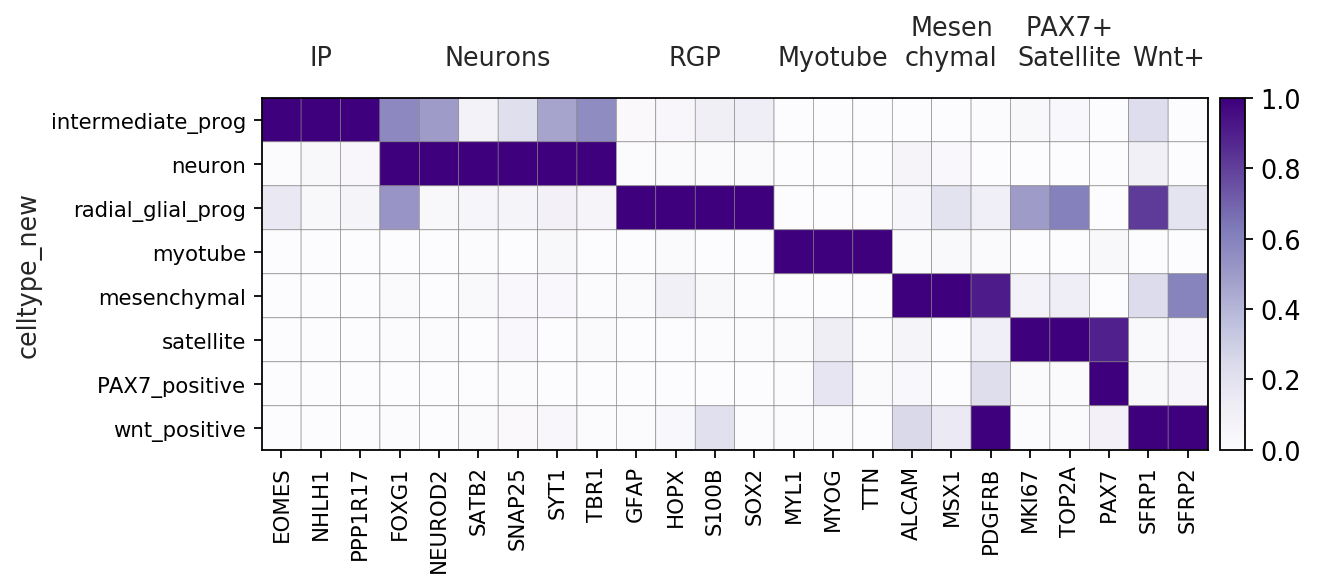

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[7.68, 0, 0.2])

In [56]:
Progenitors = ['EOMES','NHLH1', 'PPP1R17']
Neurons = ['FOXG1','NEUROD2','SATB2','SNAP25','SYT1','TBR1']
Glia = ['GFAP','HOPX','S100B','SOX2']
PAX7_pos_Satellite =['MKI67','TOP2A','PAX7']
Myotube = ['MYL1','MYOG','TTN']
Mesenchymal=['ALCAM','MSX1','PDGFRB']
Wnt_pos =['SFRP1','SFRP2']

var_group_positions=[(0,2),(3,8),(9,12),(13,15),(16,18),(19,21),(22,23)]
var_group_labels=['IP','Neurons','RGP','Myotube','Mesen\nchymal','PAX7+\nSatellite','Wnt+']
# var_group_positions=[(0,2)]
# var_group_labels=['Prog']

gene_list=Progenitors+Neurons+Glia+Myotube+Mesenchymal+PAX7_pos_Satellite+Wnt_pos
# gene_list=Progenitors

sc.pl.matrixplot(adata, var_names=gene_list, groupby='celltype_new',  
                 var_group_positions=var_group_positions, 
                 var_group_labels = var_group_labels,
                 standard_scale='var', cmap='Purples',
                 var_group_rotation=0, save = "Supp_Fig_4b.pdf")